In [ ]:
!git clone https://github.com/Ekata2003/Cloud-Burst-Prediction.git
%cd Cloud-Burst-Prediction
!ls -la

Cloning into 'Cloud-Burst-Prediction'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 14.67 MiB | 3.85 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (22/22), done.
/content/Cloud-Burst-Prediction
total 18952
drwxr-xr-x 5 root root     4096 Mar  6 22:18 .
drwxr-xr-x 1 root root     4096 Mar  6 22:18 ..
-rw-r--r-- 1 root root 14239529 Mar  6 22:18 cloudburst.csv
drwxr-xr-x 8 root root     4096 Mar  6 22:18 .git
drwxr-xr-x 2 root root     4096 Mar  6 22:18 models
-rw-r--r-- 1 root root   225696 Mar  6 22:18 Prediction.ipynb
-rw-r--r-- 1 root root  1685446 Mar  6 22:18 Prepocessing.ipynb
-rw-r--r-- 1 root root  1871453 Mar  6 22:18 RainPrediction3.ipynb
-rw-r--r-- 1 root root  1347828 Mar  6 22:18 RainPrediction.ipynb
-rw-r--r-- 1 root root     2932 Mar  6 22:18 README.md
d

## Explore the repository and load the weather dataset:

Examine the dataset structure and content

Rename some columns to ensure consistent naming

Create a summary of key variables and their distributions

Check for missing values and outliers

Generate basic statistical summaries

In [ ]:
# Install required packages
!pip install pandas numpy matplotlib scikit-learn seaborn xarray netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00


In [ ]:
import os
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


# Step 1: Setup and Dataset exploration

In [ ]:
df = pd.read_csv('/content/Cloud-Burst-Prediction/cloudburst.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                145460 non-null  object 
 1   Location            145460 non-null  object 
 2   MinTemp             143975 non-null  float64
 3   MaxTemp             144199 non-null  float64
 4   Rainfall            142199 non-null  float64
 5   Evaporation         82670 non-null   float64
 6   Sunshine            75625 non-null   float64
 7   WindGustDir         135134 non-null  object 
 8   WindGustSpeed       135197 non-null  float64
 9   WindDir9am          134894 non-null  object 
 10  WindDir3pm          141232 non-null  object 
 11  WindSpeed9am        143693 non-null  float64
 12  WindSpeed3pm        142398 non-null  float64
 13  Humidity9am         142806 non-null  float64
 14  Humidity3pm         140953 non-null  float64
 15  Pressure9am         130395 non-nul

In [ ]:
print(df.columns)
df.describe()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'CloudBurst Today', 'CloudBurstTomorrow'],
      dtype='object')


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
## Replace if na by median values
# Replace NaN values with the median for numeric columns only
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)
# Impute missing values in non-numeric columns with the mode or a suitable placeholder
for column in df.select_dtypes(exclude=np.number).columns:
    # Use mode if suitable, otherwise consider an appropriate placeholder like 'Unknown'
    df[column].fillna(df[column].mode()[0] if not df[column].mode().empty else 'Unknown', inplace=True)

<ipython-input-6-31a6c61ba3cb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-6-31a6c61ba3cb>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


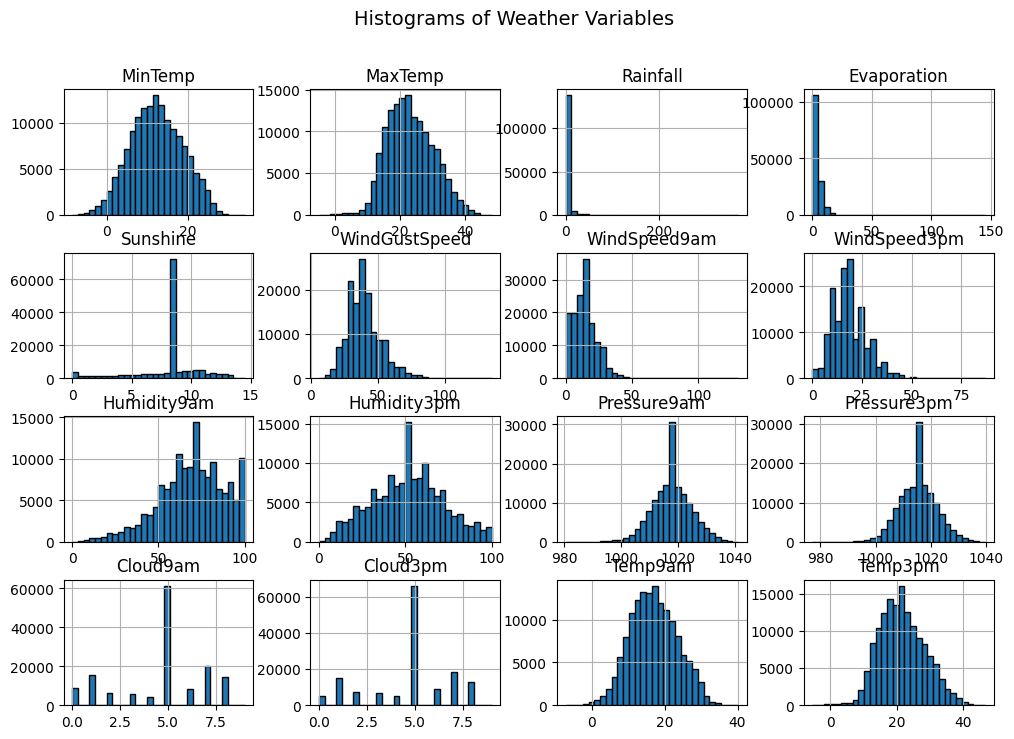

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Weather Variables", fontsize=14)
plt.show()

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


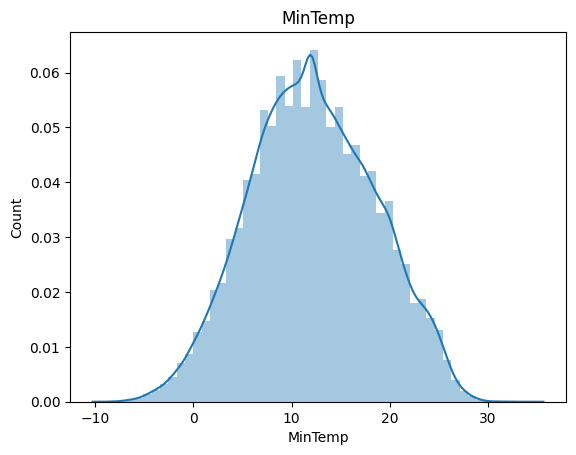

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


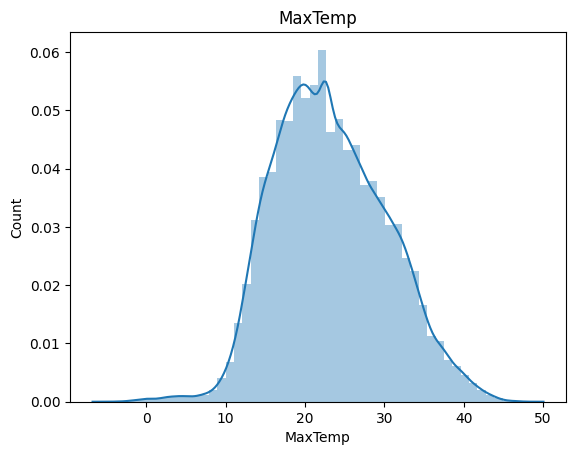

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


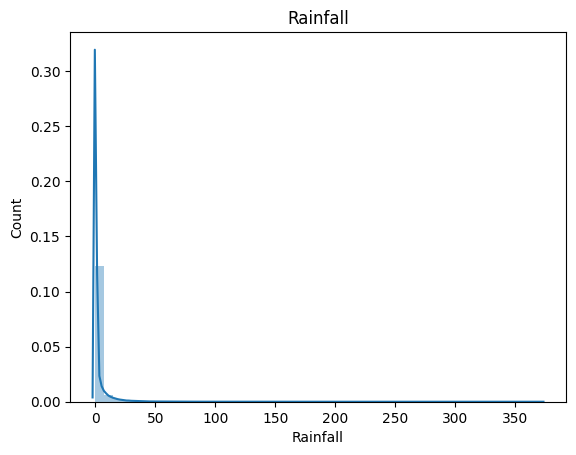

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


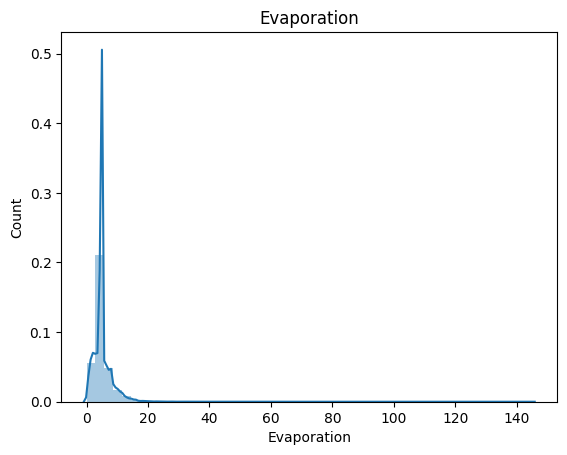

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


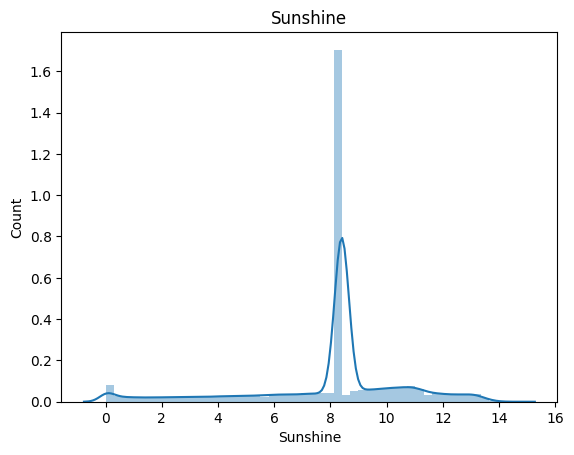

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


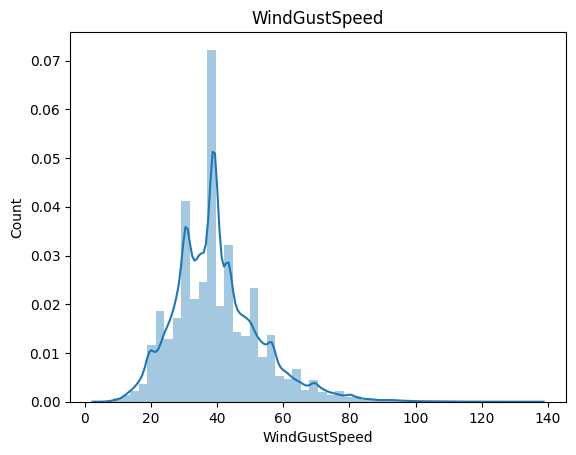

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


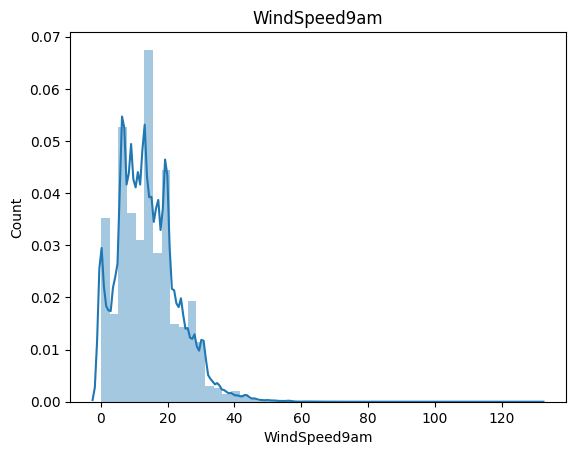

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


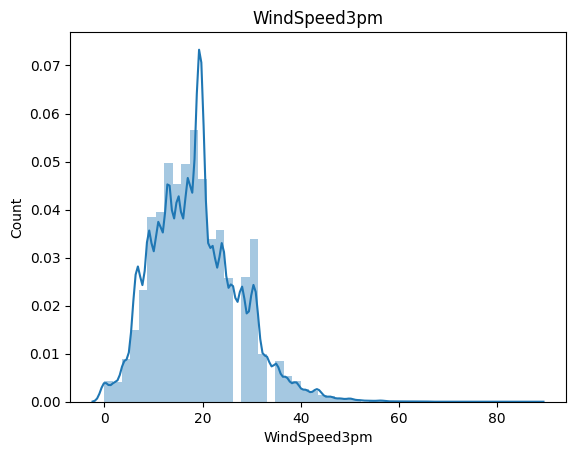

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


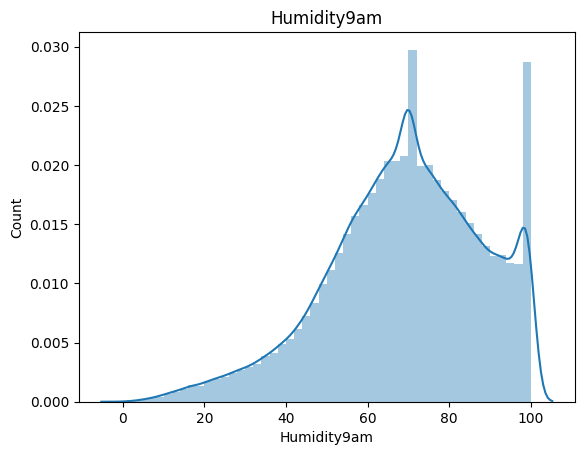

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


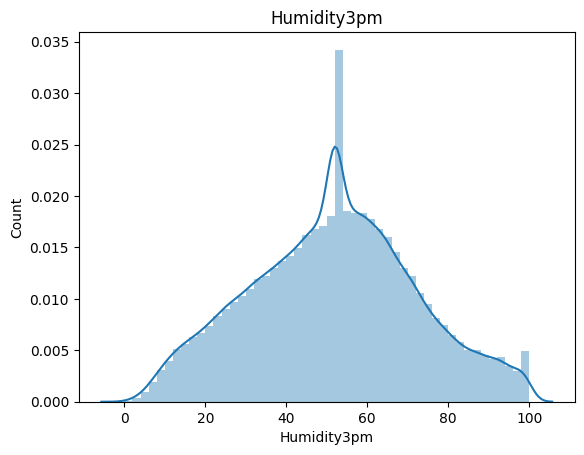

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


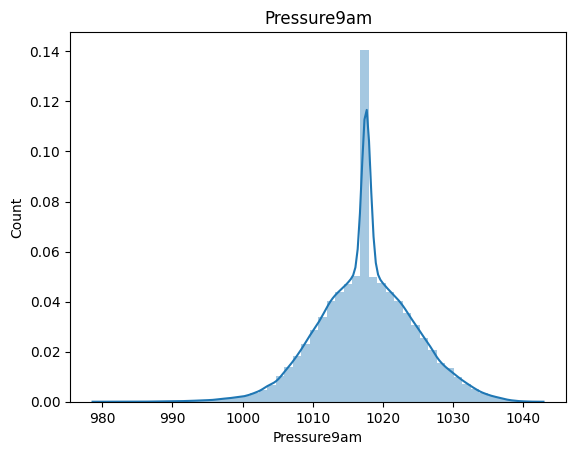

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


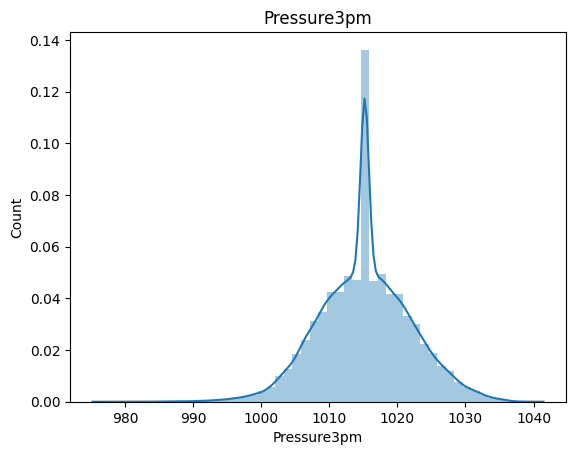

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


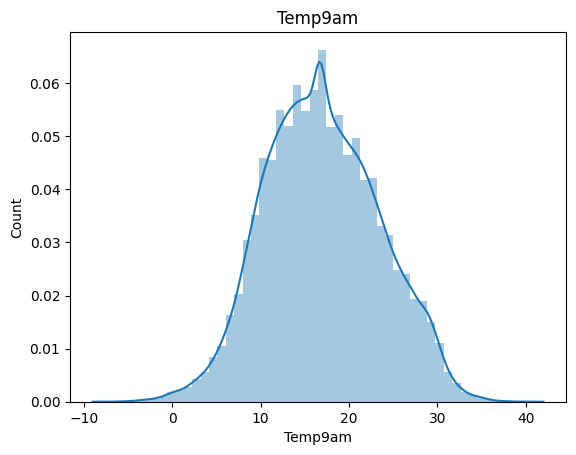

<Figure size 1500x1500 with 0 Axes>

<ipython-input-16-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


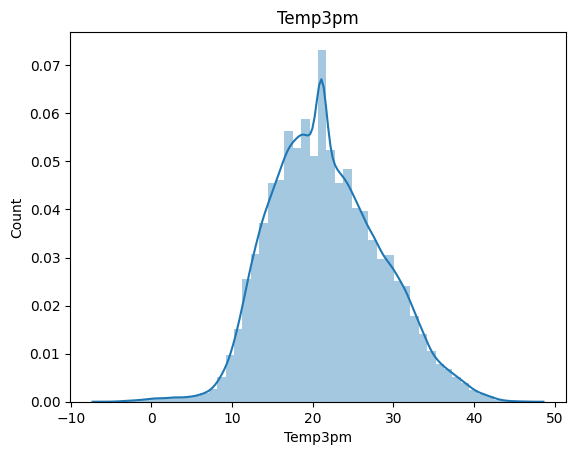

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

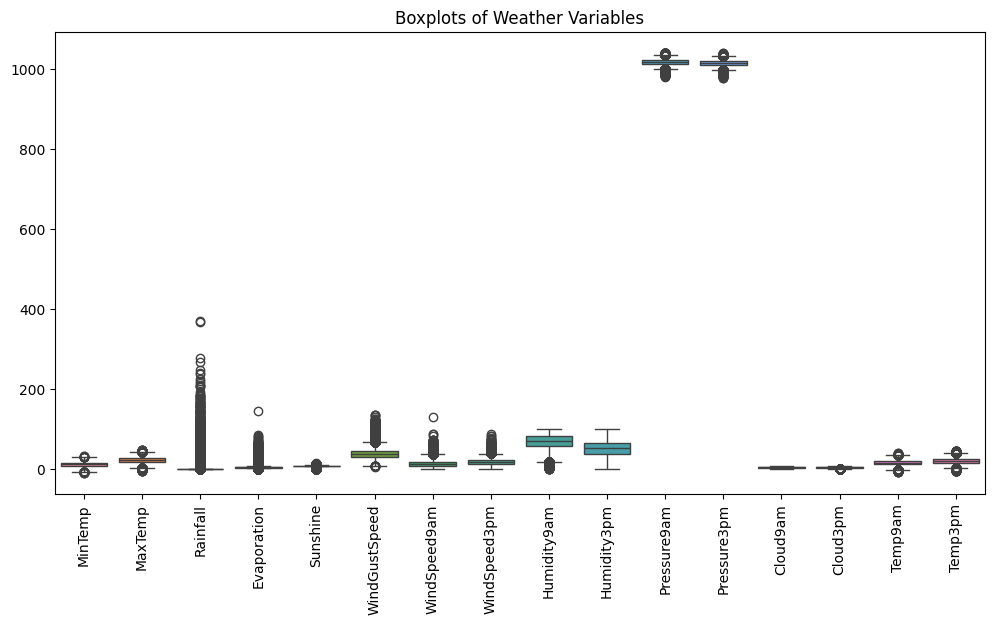

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate column names
plt.title("Boxplots of Weather Variables")
plt.show()

# Step 2: Data Visualization and Feature

In [ ]:
# Check unique values in CloudBurstToday & CloudBurstTomorrow
print(df['CloudBurst Today'].value_counts())
print(df['CloudBurstTomorrow'].value_counts())

# Check data types
print(df[['CloudBurst Today', 'CloudBurstTomorrow']].dtypes)


CloudBurst Today
No     113575
Yes     31880
Name: count, dtype: int64
CloudBurstTomorrow
No     113578
Yes     31877
Name: count, dtype: int64
CloudBurst Today      object
CloudBurstTomorrow    object
dtype: object


In [ ]:
# Check if dataset includes a precipitation column
print(df.columns)  # Look for precipitation-related columns

print(df['Rainfall'].describe())

# Check threshold used in the dataset
threshold = df.groupby('CloudBurst Today')['Rainfall'].mean()
print("Average precipitation for CloudBurstToday categories:")
print(threshold)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'CloudBurst Today', 'CloudBurstTomorrow', 'Rainfall_Lag1',
       'Humidity_Lag1', 'Cloud_Lag1', 'Rainfall_Lag2', 'Humidity_Lag2',
       'Cloud_Lag2', 'Rainfall_Lag3', 'Humidity_Lag3', 'Cloud_Lag3',
       'Rainfall_Lag4', 'Humidity_Lag4', 'Cloud_Lag4', 'Rainfall_Lag5',
       'Humidity_Lag5', 'Cloud_Lag5', 'Location_encoded',
       'WindGustDir_encoded', 'WindDir9am_encoded', 'WindDir3pm_encoded'],
      dtype='object')
count    145455.000000
mean          2.308058
std           8.389907
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: Rainfall, dtype: float64
Average precipitation for CloudBurstToday ca

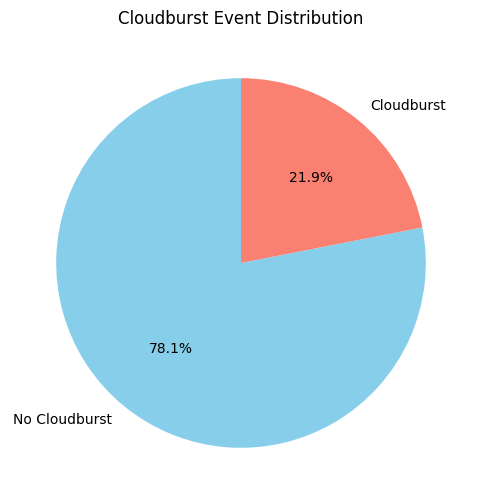

In [ ]:
# Compute counts for each class
cloudburst_counts = df['CloudBurst Today'].value_counts()

# Plot pie chart >> showing percentage distribution of cloudbursts
plt.figure(figsize=(6, 6))
plt.pie(cloudburst_counts, labels=['No Cloudburst', 'Cloudburst'], autopct='%1.1f%%', colors=["skyblue", "salmon"], startangle=90)
plt.title("Cloudburst Event Distribution")
plt.show()

In [ ]:
# Convert cloudburst to binary variables
df['CloudBurst Today'] = df['CloudBurst Today'].map({'Yes': 1, 'No': 0})
df['CloudBurstTomorrow'] = df['CloudBurstTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df['Rainfall'].isnull().sum())  # Count missing values
print(df['Rainfall'].dtype)  # Check data type
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)  # Fill missing values with median

0
float64


<ipython-input-21-82000ebbff29>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)  # Fill missing values with median


In [ ]:
min_precip_cloudburst = df[df['CloudBurst Today'] == 1]['Rainfall'].min()
print(f"Minimum rainfall classified as a cloudburst in dataset: {min_precip_cloudburst} inches/hr")


Minimum rainfall classified as a cloudburst in dataset: 1.1 inches/hr


In [ ]:
# Misclassified cases
misclassified_low = df[(df['CloudBurst Today'] == 1) & (df['Rainfall'] < 3.94)]
misclassified_high = df[(df['CloudBurst Today'] == 0) & (df['Rainfall'] >= 3.94)]

print(f"Number of cases where CloudBurstToday = 1 but Rainfall < 3.94inches: {len(misclassified_low)}")
print(f"Number of cases where CloudBurstToday = 0 but Rainfall >= 3.94inches: {len(misclassified_high)}")

Number of cases where CloudBurstToday = 1 but Rainfall < 3.94inches: 12902
Number of cases where CloudBurstToday = 0 but Rainfall >= 3.94inches: 0


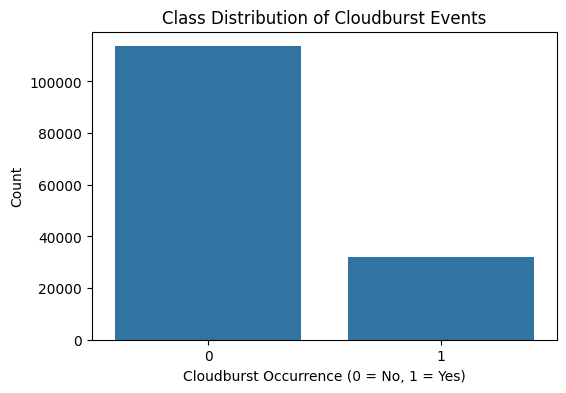

Percentage: 21.92%


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['CloudBurst Today'])
plt.title("Class Distribution of Cloudburst Events")
plt.xlabel("Cloudburst Occurrence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(f"Percentage: {df['CloudBurst Today'].sum()/len(df)*100:.2f}%")

                      MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp              1.000000  0.733363  0.102338     0.364800  0.032632   
MaxTemp              0.733363  1.000000 -0.073560     0.447294  0.315487   
Rainfall             0.102338 -0.073560  1.000000    -0.041373 -0.168776   
Evaporation          0.364800  0.447294 -0.041373     1.000000  0.279211   
Sunshine             0.032632  0.315487 -0.168776     0.279211  1.000000   
WindGustSpeed        0.171898  0.066455  0.125109     0.149943 -0.031229   
WindSpeed9am         0.173512  0.014399  0.084585     0.148682 -0.012196   
WindSpeed3pm         0.173053  0.049509  0.055690     0.101266  0.023176   
Humidity9am         -0.231330 -0.498359  0.220659    -0.384296 -0.330035   
Humidity3pm          0.006107 -0.498723  0.247943    -0.293652 -0.430363   
Pressure9am         -0.423307 -0.308052 -0.158824    -0.213669  0.035765   
Pressure3pm         -0.432832 -0.396332 -0.119407    -0.233602 -0.010613   
Cloud9am    

Text(0.5, 1.0, 'Correlation Heatmap')

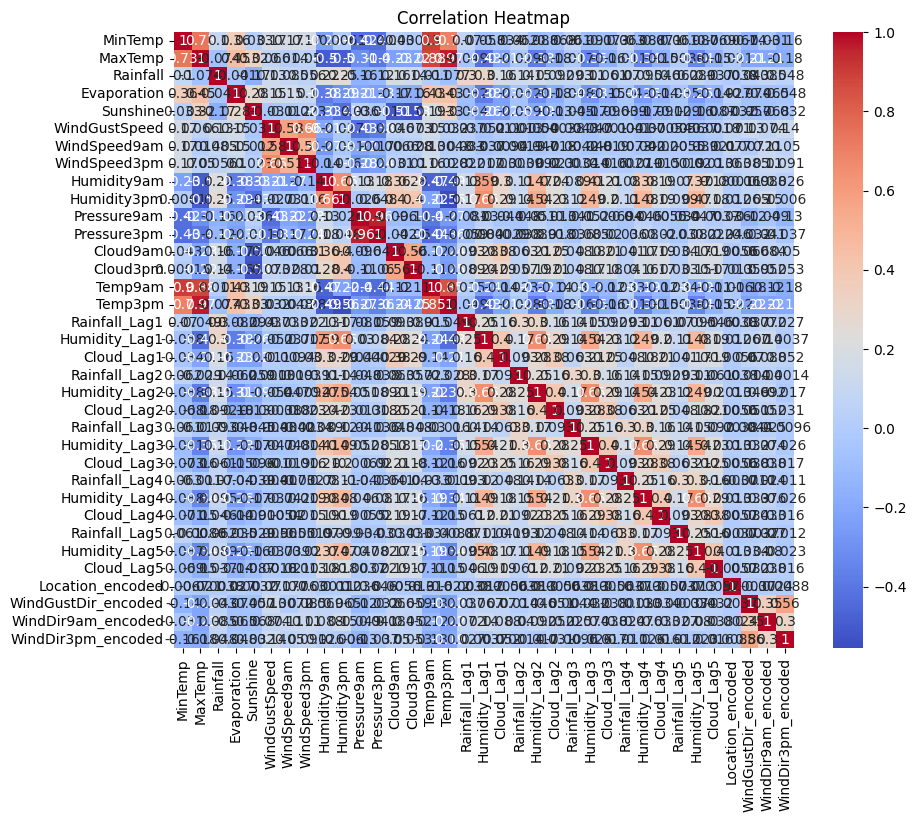

In [ ]:
# Create a correlation matrix
# Create a correlation matrix, excluding non-numerical columns, remove Cloudburst events
df_numeric = df.select_dtypes(include=np.number)
df_numeric = df_numeric.drop(columns=['CloudBurst Today', 'CloudBurstTomorrow'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [ ]:
# Compute correlation of all variables with CloudBurstToday
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix_1 = df_numeric.corr()["CloudBurst Today"].drop("CloudBurst Today").sort_values(ascending=False)

# Display the correlation values
print(correlation_matrix_1)

Rainfall              0.502807
Humidity3pm           0.367919
Humidity9am           0.346902
CloudBurstTomorrow    0.305744
Cloud9am              0.235639
Cloud3pm              0.205383
WindGustSpeed         0.145332
WindSpeed9am          0.098901
WindSpeed3pm          0.077084
MinTemp               0.054671
Temp9am              -0.095826
Pressure3pm          -0.099485
Evaporation          -0.138946
Pressure9am          -0.177958
MaxTemp              -0.225192
Temp3pm              -0.229571
Sunshine             -0.234048
Name: CloudBurst Today, dtype: float64


The top three features most strongly correlated with cloudbursts are "rainfall", "humidity"(in general), "cloudburst tomorrow". They are all positively correlated with the cloudburst record of today. The result suggests that rainfall and humidity are two key features in identifying a cloudburst. Indeed, cloudburst is defined as a heavy rainfall that can accumulate 100mm within an hour, which we can see that they are 50% related. Additionally, it shows that a cloudburst on one day increases the probability of another occurring the next day. This is likely due to the similar conditions for a cloudburst to occur that cannot usually change massively within only 48 hours. It is also important to note that other variables such as "sunshine" and "cloud" are relatively related to cloudbursts, which makes sense as they are involved in the cloudburst formation process.

In [ ]:
## Time Series Patterns
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Use 'dayfirst=True' if format is DD-MM-YYYY

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Verify the date conversion
print(df.index.min(), "to", df.index.max())
print(df.head())

2007-11-01 00:00:00 to 2017-06-25 00:00:00
           Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-06   Albury     14.6     29.7       0.2          4.8       8.4   
2008-12-07   Albury     14.3     25.0       0.0          4.8       8.4   
2008-12-08   Albury      7.7     26.7       0.0          4.8       8.4   
2008-12-09   Albury      9.7     31.9       0.0          4.8       8.4   
2008-12-10   Albury     13.1     30.1       1.4          4.8       8.4   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  \
Date                                                         ...   
2008-12-06         WNW           56.0          W          W  ...   
2008-12-07           W           50.0         SW          W  ...   
2008-12-08           W           35.0        SSE          W  ...   
2008-12-09         NNW           80.0         SE         NW  ...   
2008-12-10           W        

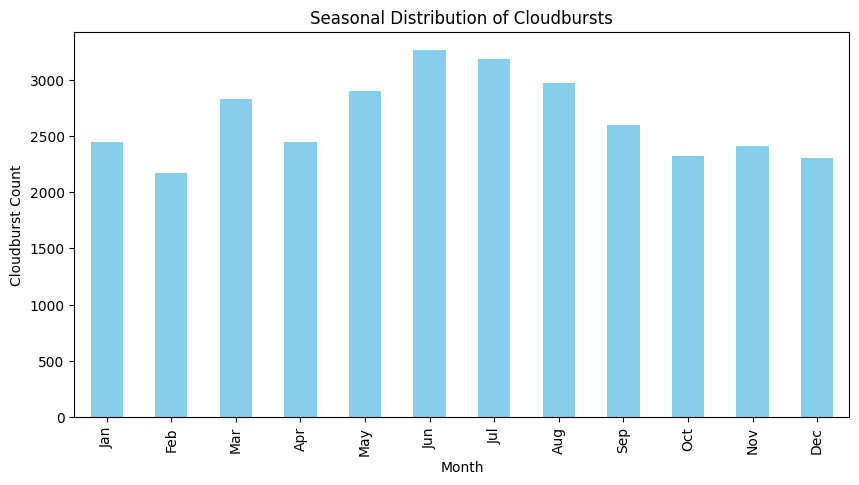

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for month and season
df["Month"] = df.index.month
df["Year"] = df.index.year
df["Season"] = df["Month"].map({12: "Winter", 1: "Winter", 2: "Winter",
                                 3: "Spring", 4: "Spring", 5: "Spring",
                                 6: "Summer", 7: "Summer", 8: "Summer",
                                 9: "Fall", 10: "Fall", 11: "Fall"})

# Count cloudburst occurrences per month
monthly_cloudbursts = df.groupby("Month")["CloudBurst Today"].sum()

# Plot seasonal patterns
plt.figure(figsize=(10, 5))
monthly_cloudbursts.plot(kind="bar", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Cloudburst Count")
plt.title("Seasonal Distribution of Cloudbursts")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


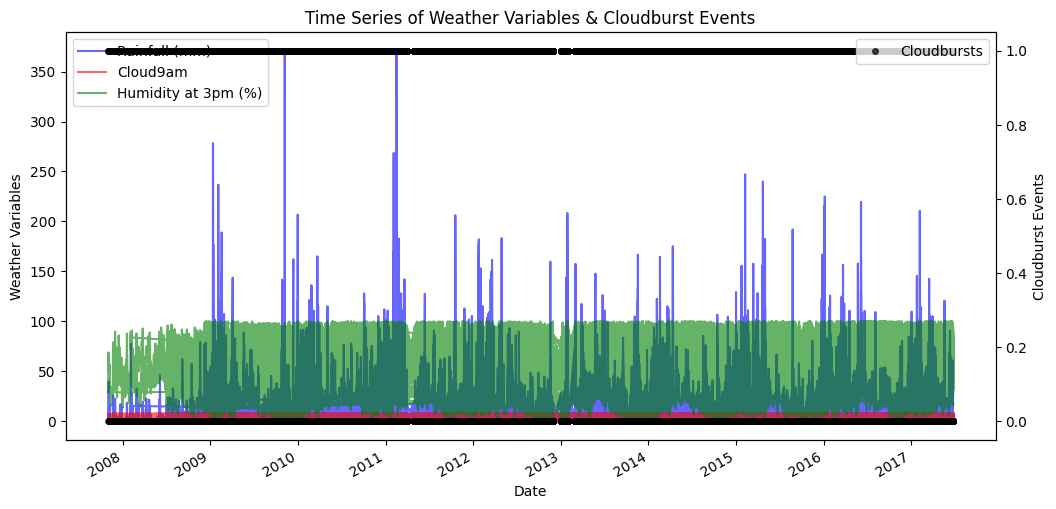

In [ ]:
import seaborn as sns

# Plot time series of weather variables with cloudbursts marked
fig, ax = plt.subplots(figsize=(12, 6))

# Plot key weather variables
df["Rainfall"].plot(ax=ax, color="blue", label="Rainfall (mm)", alpha=0.6)
df["Cloud9am"].plot(ax=ax, color="red", label="Cloud9am", alpha=0.6)
df["Humidity3pm"].plot(ax=ax, color="green", label="Humidity at 3pm (%)", alpha=0.6)

# Overlay Cloudburst events
ax2 = ax.twinx()
ax2.plot(df.index, df["CloudBurst Today"], "o", color="black", markersize=4, label="Cloudbursts", alpha=0.7)

# Labels and legend
ax.set_ylabel("Weather Variables")
ax2.set_ylabel("Cloudburst Events")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Time Series of Weather Variables & Cloudburst Events")
plt.show()


In [ ]:
# Create lagged features (1 to 5 days before)
lags = [1, 2, 3, 4, 5]
for lag in lags:
    df[f"Rainfall_Lag{lag}"] = df["Rainfall"].shift(lag)
    df[f"Humidity_Lag{lag}"] = df["Humidity3pm"].shift(lag)
    df[f"Cloud_Lag{lag}"] = df["Cloud9am"].shift(lag)

# Drop missing values (caused by shifting)
df.dropna(inplace=True)

# Convert 'Location' and other categorical columns to numerical using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical features
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season']  # Include 'Location'
for col in categorical_features:
    if col in df.columns:
        df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
df_numeric = df[numerical_features]

# Check the correlation between lagged variables and cloudbursts
corr_lagged = df_numeric.corr()["CloudBurst Today"].drop("CloudBurst Today").sort_values(ascending=False)
print(corr_lagged.head(20))  # Show top 20 correlated lagged features

Rainfall               0.502812
Humidity_Lag1          0.433149
Humidity3pm            0.367921
Humidity9am            0.346903
CloudBurstTomorrow     0.305755
Cloud_Lag1             0.244255
Cloud9am               0.235653
Rainfall_Lag1          0.233855
Humidity_Lag2          0.217992
Cloud3pm               0.205393
WindDir9am_encoded     0.167743
Humidity_Lag3          0.165766
Humidity_Lag4          0.147326
WindGustSpeed          0.145371
Humidity_Lag5          0.143189
Cloud_Lag2             0.125655
WindGustDir_encoded    0.124694
WindDir3pm_encoded     0.121742
Rainfall_Lag2          0.115437
WindSpeed9am           0.098897
Name: CloudBurst Today, dtype: float64


In [ ]:
# Select only rows where cloudburst occurred
cloudburst_days = df[df["CloudBurst Today"] == 1]

# Compute the average weather variables before cloudbursts
avg_conditions = cloudburst_days[["Rainfall_Lag1", "Humidity_Lag1", "Cloud_Lag1"]].mean()

# Print results
print("Average Weather Conditions one-day Before Cloudbursts:")
print(avg_conditions)

Average Weather Conditions one-day Before Cloudbursts:
Rainfall_Lag1     6.011456
Humidity_Lag1    68.291195
Cloud_Lag1        5.711534
dtype: float64


The result suggests that one day before the cloudburst occurs, the typical weather features are having 6.01 mm/hr precipitation, reaching 68.3% humidity level, and 5.71 cloud coverage value. Overall, there aren't any significantly noticeable characteristics for cloudbursts.

## Step 3: Statistical Modeling

CloudBurst Today
0    113571
1     31879
Name: count, dtype: int64
Logistic Regression Results:
Accuracy: 0.8052939154348573
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     22801
           1       0.62      0.26      0.36      6289

    accuracy                           0.81     29090
   macro avg       0.72      0.61      0.62     29090
weighted avg       0.78      0.81      0.77     29090

ROC-AUC: 0.7795419596497908


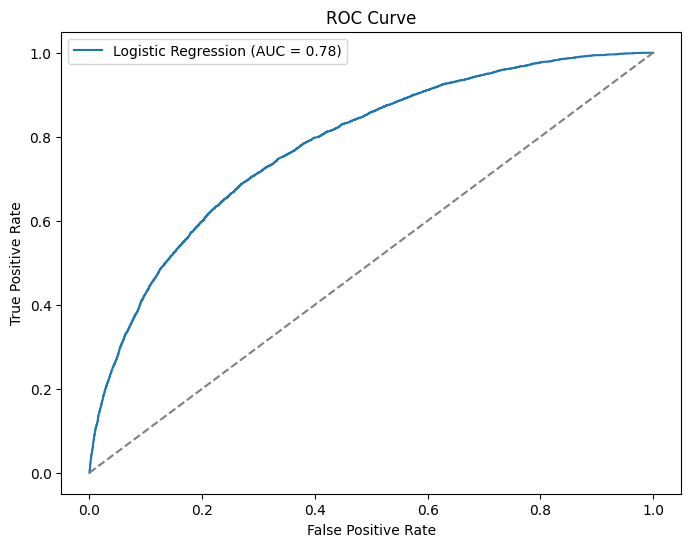

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data (assuming 'df' is already prepared)
df = df.dropna()

# Select Features (Exclude CloudBurstToday from features)
X = df[['WindSpeed3pm', 'Humidity9am', 'Cloud3pm', 'Temp9am']]
y = df['CloudBurst Today']  # Target Variable

X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Check class distribution
print(y.value_counts())

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions & Evaluation (Logistic Regression)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities
y_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


 Random Forest Results:
Accuracy: 0.7796493640426263
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     22801
           1       0.49      0.37      0.42      6289

    accuracy                           0.78     29090
   macro avg       0.66      0.63      0.64     29090
weighted avg       0.76      0.78      0.77     29090

ROC-AUC: 0.7795419596497908


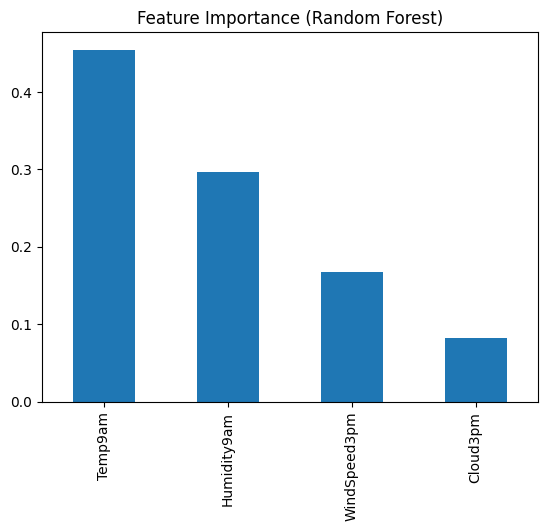

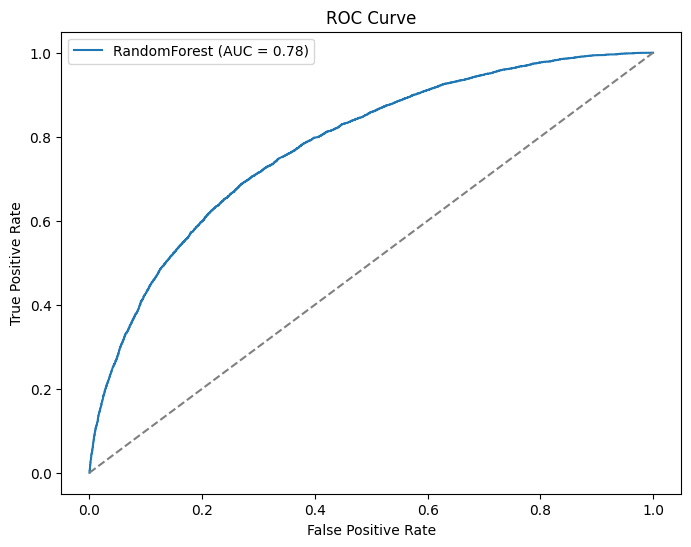

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & Evaluation (Random Forest)
y_pred_rf = rf_model.predict(X_test)
print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance (Random Forest)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance (Random Forest)")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="RandomForest (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

## Step 4: Model Analysis

Cross-validation (CV) is a technique to improve model reliability by testing it on multiple subsets of the data instead of a single train-test split. Used here to further prove model reliability.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Model
log_reg = LogisticRegression()

# Perform 5-Fold Cross-Validation
log_cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression Cross-validation Accuracy Scores:", log_cv_scores)
print("Mean Accuracy:", log_cv_scores.mean())

In [ ]:
# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

print("Random Forest Cross-validation Accuracy Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

### Possible ways of improvement:
The models might get improved by including the lag terms as many of them are shown to be relatively correlated to "CloudBurst Today", indicating that they can contribute to the prediction of cloudburst. Some explanatory variables are likely to form interaction terms such as rainfall and humidity that are closely related, further explain the event.

## Step 5: Reflection

### What are the properties of an ideal dataset to develop our cloudburst models?
The ideal dataset should first contain the date columns that we need, which must include accurate hourly records. This high temporal resolution is preferred to capture rapid meteorological changes that would potentially lead to a cloudburst. Then, the data needs to have high spatial resolution because cloudburst normally happens regionally. Hence, this high resolution is better at capturing this localized event. Also, it should contain various reliable meteorological variables such as precipitation, humidity, and temperature. These factors are essential for a more accurate cloudburst prediction.

### What was the most surprising or interesting thing you discovered about the dataset?
I did not expect that the cloudburst that happened today is quite highly correlated with cloudburst tomorrow because I expected this event to be more random and sudden, occurring independently based on large-scale weather systems. However, this higher correlation seems to be sensible as the conditions for causing cloudbursts are similar.

### What challenges did you face during your exploration, and how did you overcome them?
When computing the logistic regression and random forest, I noticed something went wrong as the results are showing 100% precision and recall. This problem extends to the next step when running the cross-validation. I thought it was because I did not remove the target variables from X, but the issue has not been resolved after correcting this. Then, I tried to drop more of my explanatory variables, which solved the overfitting issue.
